# And/Or 연산을 수행하는 퍼셉트론

In [56]:
def perceptron(x1, x2, b):
    z = w1 * x1 + w2 * x2 + b
    if z <= 0:
        return -1
    else:
        return 0

In [57]:
print("AND Gate")
w1 = float(input("Enter the weight for x1: "))
w2 = float(input('Enter the weight for x2: '))
bias = float(input("Enter the bias"))

for xs in [(1, 1), (1, 0), (0, 1), (0, 0)]:
    result = perceptron(xs[0], xs[1], bias)
    print(xs,':', result)

AND Gate
(1, 1) : -1
(1, 0) : 0
(0, 1) : 0
(0, 0) : 0


In [86]:
print("OR Gate")
w1 = float(input("Enter the weight for x1: "))
w2 = float(input('Enter the weight for x2: '))
bias = float(input("Enter the bias"))

for xs in [(1, 1), (1, 0), (0, 1), (0, 0)]:
    result = perceptron(xs[0], xs[1], bias)
    print(xs,':', result)

OR Gate
(1, 1) : -1
(1, 0) : -1
(0, 1) : -1
(0, 0) : 0


# 단층 퍼셉트론 연습

In [59]:
import sklearn.datasets as d
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as mt
import numpy as np

In [60]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd

In [61]:
iris = load_iris()

X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = Perceptron(max_iter=2000, eta0=0.1, tol=0.001)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 2,  9,  7],
       [ 0,  0, 11]], dtype=int64)

# 다층 퍼셉트론 연습

In [63]:
import tensorflow as tf
tf.__version__

'2.9.0'

In [64]:
from tensorflow import keras
keras.__version__

'2.9.0'

# 심층 신경망

In [65]:
#Keras 설치

In [66]:
#!pip install --upgrade tensorflow

In [67]:
#!pip install upgrade keras

In [68]:
import keras

In [69]:
keras.__version__

'2.9.0'

### [실습 1] Keras를 활용한 심층신경망 모델 구현(붓꽃 분류)

In [70]:
#1) 데이터 전처리 및 분할
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target

In [71]:
from tensorflow.keras.utils import to_categorical

y = to_categorical(y, 3)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [72]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [73]:
#2) 인공 신경망 모형 구성
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=8, input_dim=4, activation='relu')) # relu : 시그모이드보다 더 좋은 함수
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [74]:
# 3) 모형의 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics='accuracy')

In [75]:
# 4)모델 학습
hist = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=True)

Epoch 1/100
11/11 [==============================] - 0s 1ms/step - loss: 1.8748 - accuracy: 0.4381
Epoch 2/100
11/11 [==============================] - 0s 1ms/step - loss: 1.6401 - accuracy: 0.6286
Epoch 3/100
11/11 [==============================] - 0s 1ms/step - loss: 1.4694 - accuracy: 0.6286
Epoch 4/100
11/11 [==============================] - 0s 858us/step - loss: 1.3320 - accuracy: 0.6286
Epoch 5/100
11/11 [==============================] - 0s 1ms/step - loss: 1.2745 - accuracy: 0.6000
Epoch 6/100
11/11 [==============================] - 0s 1ms/step - loss: 1.2256 - accuracy: 0.4952
Epoch 7/100
11/11 [==============================] - 0s 1ms/step - loss: 1.1889 - accuracy: 0.3905
Epoch 8/100
11/11 [==============================] - 0s 1ms/step - loss: 1.1397 - accuracy: 0.2952
Epoch 9/100
11/11 [==============================] - 0s 1ms/step - loss: 1.1117 - accuracy: 0.0381
Epoch 10/100
11/11 [==============================] - 0s 961us/step - loss: 1.1001 - accuracy: 0.1238
Epoch

In [76]:
# epoch별 손실함수 값, 평가지표 시각화
import pandas as pd
pd.DataFrame(hist.history)

,loss,accuracy
0,1.874790,0.438095
1,1.640068,0.628571
2,1.469442,0.628571
3,1.332028,0.628571
4,1.274494,0.600000
...,...,...
95,0.439587,0.952381
96,0.434749,0.942857
97,0.434185,0.923810
98,0.429187,0.952381


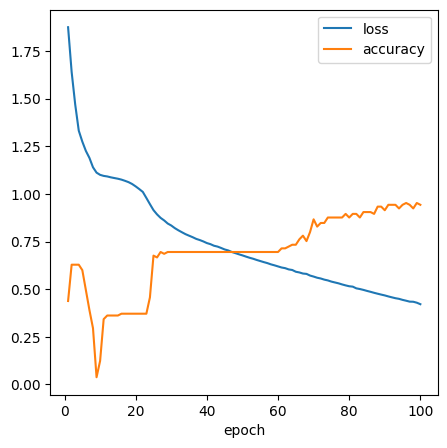

In [77]:
# epoch별 손실함수 값, 평가지표 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
plt.plot(range(1, 101), hist.history['loss'], label='loss')
plt.plot(range(1, 101), hist.history['accuracy'], label='accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [78]:
# 5) 모형의 성능평가

loss, acc = model.evaluate(X_test, y_test) # 디폴트 배치값이 32이라서 2번으로 진행됨
print(f'loss={loss:.3f}')
print(f'accuracy={acc:.3f}')

2/2 [==============================] - 0s 3ms/step - loss: 0.4954 - accuracy: 0.8667
loss=0.495
accuracy=0.867


In [79]:
import numpy as np
np.set_printoptions(suppress=True)

In [80]:
y_pred = model.predict(X_test)
y_pred
# scickit learn 과 다르게 클래스 이름을 알기 위해 추가적인 코딩이 필요하다
#  0일 확률     1일 확률    2일 확률

2/2 [==============================] - 0s 6ms/step


array([[0.00003812, 0.07399039, 0.92597145],
       [0.02654966, 0.6131853 , 0.36026508],
       [0.59130156, 0.26472688, 0.14397158],
       [0.00011047, 0.12919018, 0.8706993 ],
       [0.59130156, 0.26472688, 0.14397158],
       [0.00000968, 0.05562649, 0.9443638 ],
       [0.59130156, 0.26472688, 0.14397158],
       [0.00441402, 0.5561253 , 0.43946066],
       [0.00467422, 0.49886847, 0.49645737],
       [0.01452724, 0.63449174, 0.35098106],
       [0.00065421, 0.21977489, 0.77957094],
       [0.00534913, 0.6052006 , 0.3894502 ],
       [0.00693435, 0.5520371 , 0.44102845],
       [0.00400172, 0.47397467, 0.5220237 ],
       [0.00394045, 0.49006888, 0.5059906 ],
       [0.59130156, 0.26472688, 0.14397158],
       [0.00376699, 0.48292744, 0.51330554],
       [0.00733705, 0.5116366 , 0.48102626],
       [0.59130156, 0.26472688, 0.14397158],
       [0.59130156, 0.26472688, 0.14397158],
       [0.0002316 , 0.16061822, 0.83915013],
       [0.00318468, 0.47681016, 0.52000517],
       [0.

In [81]:
np.argmax(y_pred, axis=-1) # axis=-1은 가로로 봐달라는 파라미터

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int64)

In [82]:
y_pred_class = np.argmax(y_pred, axis=-1) # axis=-1은 가로로 봐달라는 파라미터
y_pred_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 2, 1, 0, 0, 2, 2,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0], dtype=int64)

In [83]:
y_test_class = np.argmax(y_test, axis=-1)
y_test_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0], dtype=int64)

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test_class, y_pred_class)

0.8666666666666667

In [85]:
#6)  임의 데이터에 대해 모형의 출력을 확인한다.

